<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98_%EA%B5%90%EC%B0%A8%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://canvas4sh.tistory.com/194

# 손실함수(loss function)

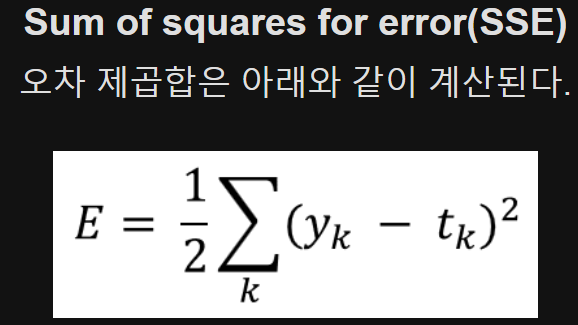

In [1]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 실제값은 5임
t = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


# 예1: '5'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.6, 0.0, 0.1, 0.0, 0.0]
result = mean_squared_error(np.array(y), np.array(t))
print(result)

# 예2 '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
result = mean_squared_error(np.array(y), np.array(t))
print(result)

0.09750000000000003
0.5974999999999999


# Cross entropy error

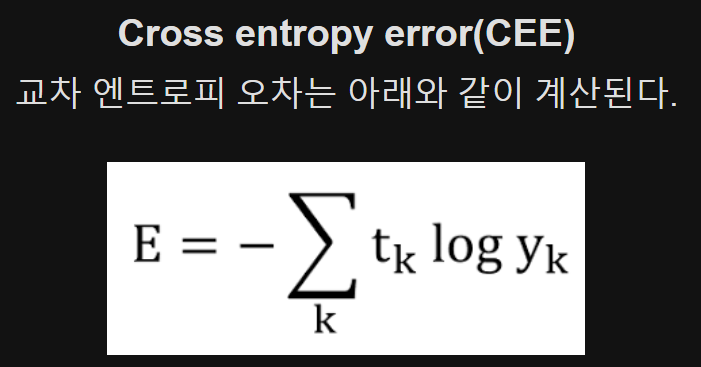

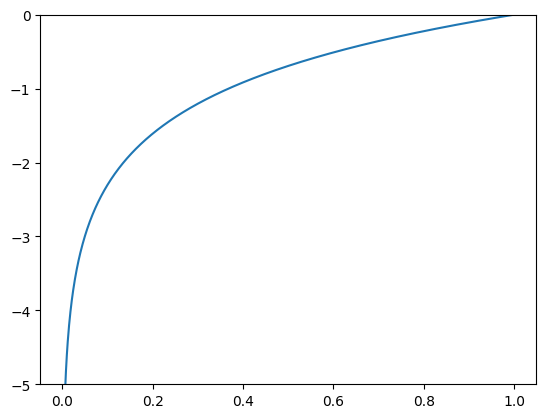

In [2]:
#자연로그 y=logx 그래프

%matplotlib inline
import matplotlib.pylab as plt

x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.0, 0.0) # y축의 범위 지정
plt.show()

In [3]:
#교차 엔트로피 구현
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))



t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]# 실제값

# 예1)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 예측값
result = cross_entropy_error(np.array(y), np.array(t))
print(result)


# 예2)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 예측값
result = cross_entropy_error(np.array(y), np.array(t))
print(result)

0.510825457099338
2.302584092994546


# 미니배치
훈련 데이터 모두에 대한 손실함수의 평균을 구하여 해당 지표를 이용한다.
교차 엔트로피 오차(훈련 데이터 모두에 대한) 수식은 아래와 같다.

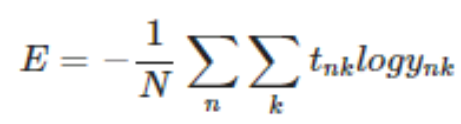

이때 빅데이터 수준으로 학습 데이터의 양이 늘어나면 수많은 데이터를 대상으로 손실 함수의 합을 구하는 것은 현실적으로 불가능하다.
이때 데이터의 일부를 이용해 전체의 근사치로 이용하여 지표를 정하고 학습할 수 있다.

In [5]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_test.shape)

#(60000, 784)
#(60000, 10)

(60000, 28, 28)
(10000,)


In [6]:
# 정규화
x_train = x_train / 255
x_test = x_test / 255

# y데이터를 onehot 데이터로 인코딩
# 원-핫 인코딩을 진행하여 정답 위치의 원소만 1이고 나머지가 0인 배열을 얻는다.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
train_size = x_train.shape[0]
batch_size = 10

# 훈련 데이터에서 무작위로 10장만 빼내려면 np.random.choice() 함수 사용,
# np.random.choice(60000, 10)은 0에서 60000 미만의 수 중에서 무작위로 10개를 골라낸다.
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = y_train[batch_mask]

In [9]:
np.random.choice(60000, 10)

array([  214,  2078, 26555, 31659,  3236, 34984, 23911, 49757, 34278,
       46390])

# (배치용) 교차 엔트로피 오차 구현하기

y는 예측값, t는 실제값





1.   t가 원-핫 인코딩(one-hot encoding)되어 있는 경우를 다룬다.
2.   따라서 t * np.log(y)에서 t가 0인 원소는 계산에서 제외되며, 실제 정답 레이블에 해당하는 클래스의 예측 확률에만 로그를 적용한다.
3. 이 로그 값을 모두 합한 후, 배치 크기로 나누어 평균 교차 엔트로피 오차를 반환한다.

In [10]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

1. 함수는 t가 레이블 인코딩(label encoding)된 경우를 다룬다
2. 즉, t는 각 데이터의 정답 레이블을 직접 가리키는 인덱스이다
3. np.log(y[np.arange(batch_size), t]) 이 부분은 각 데이터에 대해 정답 레이블에 해당하는 클래스의 예측 확률에 로그를 적용한다
4. 이 로그 값을 모두 합한 후, 배치 크기로 나누어 평균 교차 엔트로피 오차를 반환한다.

In [11]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size